### Standard PID controller



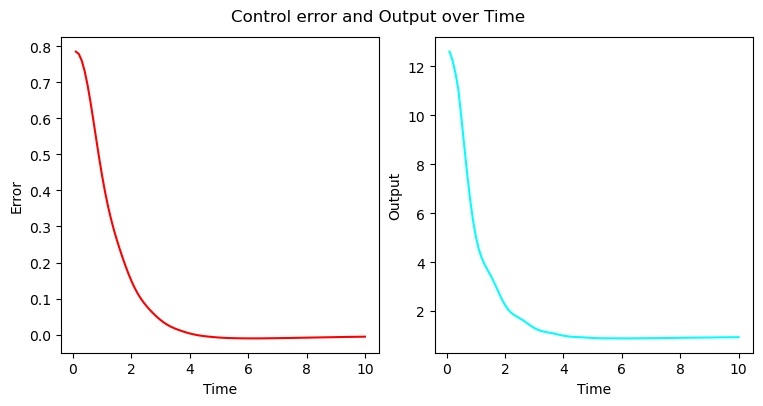

In [1]:
import numpy as np
from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from control.controlutils import plot_error

pend_system = InvertedPendulumSystem()
controller = PIDController(15.94104423478139, 1.0806148906694266, 5.159623499281683)

ticks: int = 100
delta_time: float = 0.1

time_points = np.full(ticks, delta_time).cumsum()
error_values = np.empty(ticks)
output_values = np.empty(ticks)

for tick in range(ticks):
    input = pend_system.get_control_input()
    setpoint = pend_system.get_setpoint()
    output = controller.control_output(input, setpoint, delta_time, abs_tol=None)
    pend_system.set_control_output(output, delta_time)
    error_values[tick] = controller.latest_error
    output_values[tick] = output
controller.reset()

plot_error(time_points, error_values, output_values)


### PID system controller

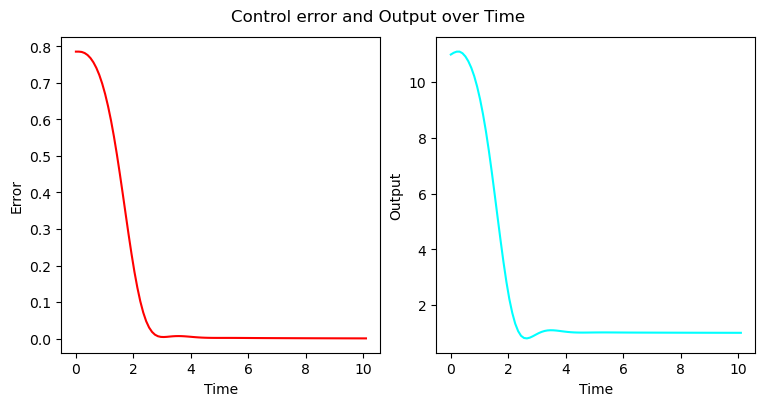

In [2]:
import numpy as np
import time
from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from control.controlutils import plot_error
from control.controllers import SystemController

pend_system = InvertedPendulumSystem()
controller = PIDController(14.0, 0.80, 2.5)
system_controller = SystemController(controller, pend_system)

ticks: int = 100
delta_time: float = 0.1
time_factor: float = 10.0

time_points = np.zeros(ticks)
error_values = np.empty(ticks)
output_values = np.empty(ticks)

for tick in range(ticks):
    _, error, output, actual_delta_time = system_controller.tick(time_factor)
    time_points[tick] = time_points[tick - 1] + actual_delta_time
    error_values[tick] = error
    output_values[tick] = output
    time.sleep(delta_time / time_factor)
controller.reset()

plot_error(time_points, error_values, output_values)


### PID automatic system controller

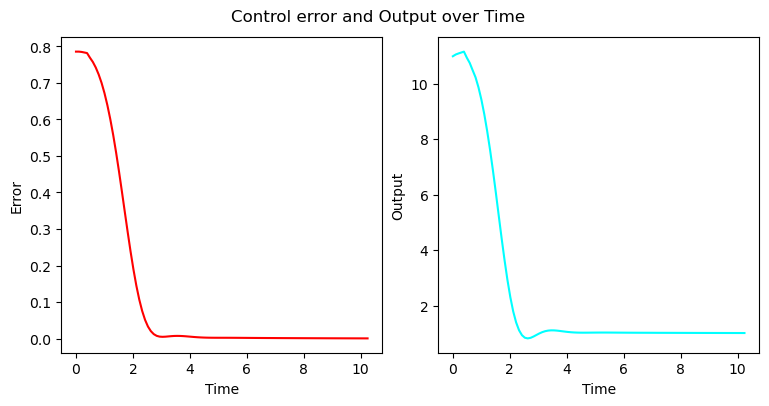

In [2]:
import numpy as np
import time
from control.pid import PIDController
from control.systems import InvertedPendulumSystem
from control.controlutils import plot_error
from control.controllers import SystemController, AutoSystemController

pend_system = InvertedPendulumSystem()
controller = PIDController(14.0, 0.80, 2.5)
system_controller = SystemController(controller, pend_system)
auto_controller = AutoSystemController(system_controller)

ticks: int = 100
delta_time: float = 0.1
time_factor: float = 10.0

time_points = np.zeros(ticks)
error_values = np.empty(ticks)
output_values = np.empty(ticks)

def update(i, e, o, dt, tt):
    global time_points, error_values, output_values
    time_points[i-1] = tt
    error_values[i-1] = e
    output_values[i-1] = o

with auto_controller.context_run(
        tick_rate=(1.0 / delta_time),
        time_factor=time_factor,
        data_callback=update,
        reset=True):
    for _ in range(ticks):
        time.sleep((delta_time / time_factor))

plot_error(time_points, error_values, output_values)


### Mass Spring Damper System

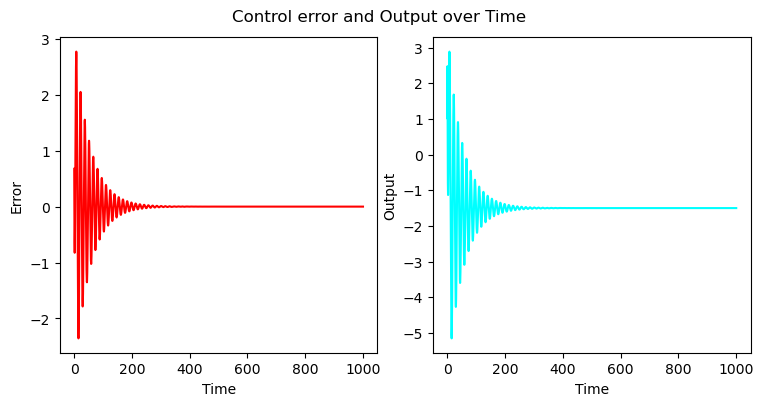

In [76]:
import numpy as np
from control.pid import PIDController
from control.systems import MassSpringDamperSystem
from control.controlutils import plot_error

mass_spring_damper_system = MassSpringDamperSystem.random_start(spring_constant=2.0, damping_constant=0.5, steady_state_error=1.5)
controller = PIDController(1.53007002, -0.23681911, -0.90448706)

ticks: int = 10000
delta_time: float = 0.1

time_points = np.full(ticks, delta_time).cumsum()
error_values = np.empty(ticks)
output_values = np.empty(ticks)

for tick in range(ticks):
    input = mass_spring_damper_system.get_control_input()
    setpoint = mass_spring_damper_system.get_setpoint()
    output = controller.control_output(input, setpoint, delta_time, abs_tol=None)
    # output = 0.0
    mass_spring_damper_system.set_control_output(output, delta_time)
    error_values[tick] = input - setpoint
    output_values[tick] = output

plot_error(time_points, error_values, output_values)

### Boiler System

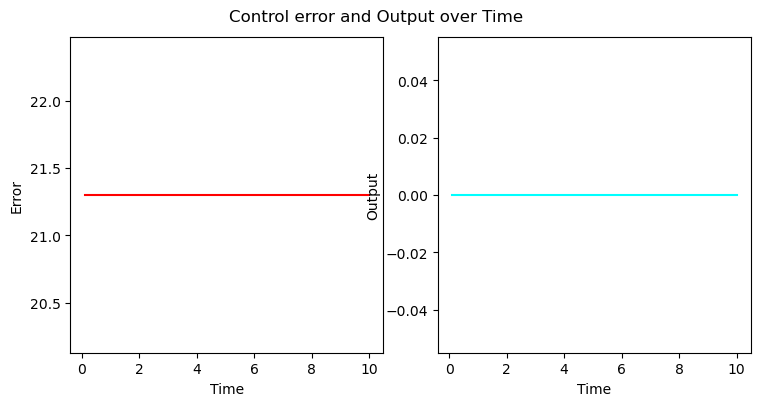

In [1]:
import numpy as np
from control.pid import PIDController
from control.systems import BoilerSystem
from control.controlutils import plot_error

boiler_system = BoilerSystem()
controller = PIDController(0.5, 0.1, 0.1)

ticks: int = 100
delta_time: float = 0.1

time_points = np.full(ticks, delta_time).cumsum()
error_values = np.empty(ticks)
output_values = np.empty(ticks)

for tick in range(ticks):
    input = boiler_system.get_control_input()
    setpoint = boiler_system.get_setpoint()
    # output = controller.control_output(input, setpoint, delta_time, abs_tol=None)
    output = 0.0
    boiler_system.set_control_output(output, delta_time)
    error_values[tick] = input
    output_values[tick] = output

plot_error(time_points, error_values, output_values)